# How to identify and avoid Overfitting using regularization

### Welcome to the 6th Lab of 42028: Deep Learning and CNN!

In this  Lab/Tutorial session you will be implementing regularization to avoid overfitting.

So lets get started!

## Tutorial:
Implementation of a  CNN architecture using Keras for classfication of Cats/Dogs Dataset from Kaggle.

## Tasks for this week:

1. Implementation of Neural Network for Dogs and Cats classification using Keras API. 
2. Train and test model and identify overfitting.
3. Data augmentation and Drop outs


### Step 1: Import required packages

we will need tensorflow, numpy, os and keras


In [0]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Step 2: Download the Cats & Dogs dataset

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2020-04-24 14:35:47--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.119.128, 2a00:1450:4013:c00::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.119.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  85.0MB/s    in 0.8s    

2020-04-24 14:35:49 (85.0 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [0]:
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')


### Step 3:  Design the CNN Architecture

Design the following CNN architecture:

<img src='http://drive.google.com/uc?export=view&id=1EAWFwp7T92q3Lm1ZrX9A2-wnvhfAfzSF' alt='Conv'>

Input: $150 X 150 X 3$ image

No. of filters:
- Conv1 : 32, 3x3
- Conv2 : 64, 3x3
- Conv4 : 128, 3x3
- Conv4 : 128, 3x3

Activation function in CONV layer: Relu

Pool: MaxPooling, 2x2

Activation function in Output layer : sigmoid, 2 classes

**Hint:** Use Conv2D(), MaxPooling2D(), Flatten(), and Dense()

In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [0]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['acc'])

### Step 4:  Training CNN with ImageDataGenerator

In [6]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [7]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
100/100 - 8s - loss: 0.6889 - acc: 0.5330 - val_loss: 0.6692 - val_acc: 0.5540
Epoch 2/100
100/100 - 8s - loss: 0.6498 - acc: 0.6140 - val_loss: 0.6274 - val_acc: 0.6550
Epoch 3/100
100/100 - 8s - loss: 0.5982 - acc: 0.6705 - val_loss: 0.6156 - val_acc: 0.6450
Epoch 4/100
100/100 - 8s - loss: 0.5648 - acc: 0.7010 - val_loss: 0.6344 - val_acc: 0.6590
Epoch 5/100
100/100 - 8s - loss: 0.5407 - acc: 0.7215 - val_loss: 0.5862 - val_acc: 0.6900
Epoch 6/100
100/100 - 8s - loss: 0.5136 - acc: 0.7475 - val_loss: 0.5800 - val_acc: 0.7000
Epoch 7/100
100/100 - 8s - loss: 0.4870 - acc: 0.7585 - val_loss: 0.6057 - val_acc: 0.6770
Epoch 8/100
100/100 - 8s - loss: 0.4672 - acc: 0.7690 - val_loss: 0.5546 - val_acc: 0.7290
Epoch 9/100
100/100 - 8s - loss: 0.4417 - acc: 0.7815 - val_loss: 0.5471 - val_acc: 0.7330
Epoch 10/100
100/100 - 8s - loss: 0.4156 - acc: 0.8015 - val_loss: 0.5708 - val_acc: 0.7170
Epoch 11/100


### Step 5:  Visualization of results and identification of overfitting

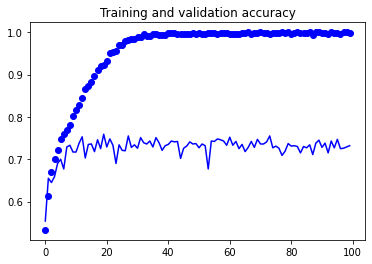

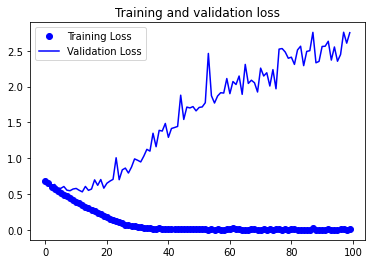

In [8]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Step 6:  Design of CNN for data augmentation

In [0]:
model_data_aug = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


### Step 7:  Using ImageDataGenerator for data augmentation

In [10]:
# This code has changed. Now instead of the ImageGenerator just rescaling
# the image, we also rotate and do other operations
# Updated to do image augmentation
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [11]:
model_data_aug.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['acc'])

history = model_data_aug.fit_generator(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/100
100/100 - 16s - loss: 0.6909 - acc: 0.5300 - val_loss: 0.6749 - val_acc: 0.5870
Epoch 2/100
100/100 - 16s - loss: 0.6832 - acc: 0.5430 - val_loss: 0.6552 - val_acc: 0.6440
Epoch 3/100
100/100 - 16s - loss: 0.6680 - acc: 0.5820 - val_loss: 0.6387 - val_acc: 0.6350
Epoch 4/100
100/100 - 16s - loss: 0.6552 - acc: 0.6050 - val_loss: 0.6126 - val_acc: 0.6550
Epoch 5/100
100/100 - 16s - loss: 0.6455 - acc: 0.6210 - val_loss: 0.6052 - val_acc: 0.6770
Epoch 6/100
100/100 - 16s - loss: 0.6217 - acc: 0.6505 - val_loss: 0.5714 - val_acc: 0.7030
Epoch 7/100
100/100 - 16s - loss: 0.6098 - acc: 0.6615 - val_loss: 0.6194 - val_acc: 0.6450
Epoch 8/100
100/100 - 16s - loss: 0.6047 - acc: 0.6795 - val_loss: 0.5550 - val_acc: 0.7260
Epoch 9/100
100/100 - 16s - loss: 0.6061 - acc: 0.6805 - val_loss: 0.5487 - val_acc: 0.7170
Epoch 10/100
100/100 - 16s - loss: 0.5847 - acc: 0.6795 - val_loss: 0.5897 - val_acc: 0.6910
Epoch 11/100
100/100 - 16s - loss: 0.5807 - acc: 0.6890 - val_loss: 0.5368 - va

### Step 8:  Visualization the results

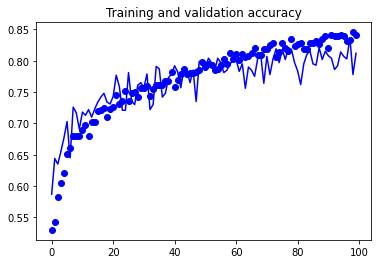

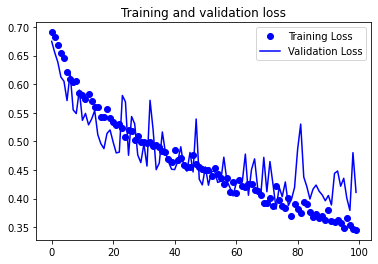

In [12]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Step 9:  Using drop outs and data augmentation

In [13]:
model_drop_out = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5), #Adding Dropout
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_drop_out.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['acc'])

# This code has changed. Now instead of the ImageGenerator just rescaling
# the image, we also rotate and do other operations
# Updated to do image augmentation
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

history = model_drop_out.fit_generator(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 - 16s - loss: 0.6922 - acc: 0.5210 - val_loss: 0.6772 - val_acc: 0.5140
Epoch 2/100
100/100 - 16s - loss: 0.6794 - acc: 0.5595 - val_loss: 0.6584 - val_acc: 0.6060
Epoch 3/100
100/100 - 16s - loss: 0.6668 - acc: 0.5865 - val_loss: 0.6358 - val_acc: 0.6480
Epoch 4/100
100/100 - 16s - loss: 0.6562 - acc: 0.6000 - val_loss: 0.6122 - val_acc: 0.6720
Epoch 5/100
100/100 - 16s - loss: 0.6357 - acc: 0.6245 - val_loss: 0.6207 - val_acc: 0.6260
Epoch 6/100
100/100 - 16s - loss: 0.6231 - acc: 0.6400 - val_loss: 0.6008 - val_acc: 0.6580
Epoch 7/100
100/100 - 16s - loss: 0.6107 - acc: 0.6710 - val_loss: 0.5623 - val_acc: 0.7100
Epoch 8/100
100/100 - 16s - loss: 0.6012 - acc: 0.6660 - val_loss: 0.5563 - val_acc: 0.7070
Epoch 9/100
100/100 - 16s - loss: 0.5948 - acc: 0.6745 - val_loss: 0.5483 - val_acc: 0.7290
Epoch 10/100
100/100 - 16s - loss: 0.5809 - acc: 0.6840 - val_loss: 0.5525 - val_acc: 0.

### Step 10:  Visualization of results

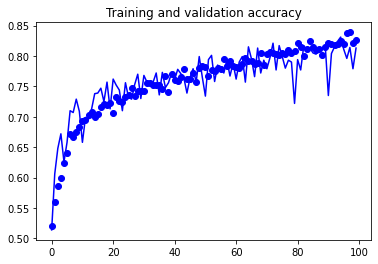

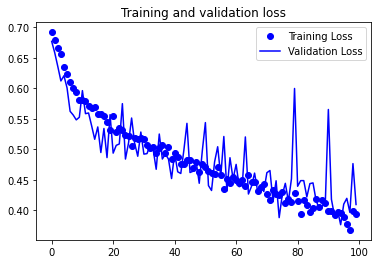

In [14]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Optional:

Try changing the Regularization to L1 and L2 and check output

Hint:

**L1** : tf.keras.regularizers.l1(l=0.01)

**L2**: tf.keras.regularizers.l2(l=0.01)

Reference: https://keras.io/regularizers/